In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict

from tqdm.notebook import tqdm 

In [2]:
def meta_to_dict(meta):
    speaker_count_dict = defaultdict(int)
    
    for m in meta:
        speaker = m[1]
        speaker_count_dict[speaker] += 1
    
    return speaker_count_dict

def compare_dict_counter(dict1, dict2):
    
    diff = list()
    c1_list = list()
    
    for key in dict1:
        c1 = dict1[key]
        c2 = dict2[key]
        diff.append(c1 - c2)
        c1_list.append(c1)
        
    fig, axes = plt.subplots(2, 1, figsize=(14, 6))
    axes[0].plot(c1_list)
    axes[0].plot(diff)
    
    axes[1].set_title("Keep Ratio", fontsize=24)
    keep_ratios = [(c - d) / c for d, c in zip(diff, c1_list)]
    axes[1].plot(keep_ratios)
    axes[1].set_ylim([0, 1])

    plt.tight_layout()
#     plt.savefig(f'{fig_name}.png')
    plt.show()
    
    print(min(keep_ratios))
    
    return diff, c1_list

def plot_statistics(values, fig_name=''):

    fig, axes = plt.subplots(3, 1, figsize=(14, 6))
    # plt.figure()
    axes[0].hist(values, bins=30, rwidth=0.9, align='mid')
    # plt.savefig(f'{fig_name}.png')

    # plt.figure()
    axes[1].hist(values, bins=30, rwidth=0.9, align='mid', density=True, cumulative=True)
    axes[1].axhline(0.95, 0, 1, c='tab:red')
    axes[1].axhline(0.9, 0, 1, c='tab:orange')

    axes[2].hist(sorted(values)[:int(0.95 * len(values))], bins=30, rwidth=0.9, align='mid')

    print(sorted(values)[:int(0.95 * len(values))][-1])
    
    plt.tight_layout()
#     plt.savefig(f'{fig_name}.png')
    plt.show()

    return

In [3]:
with open('vox1_test.csv', 'r') as f:
    csv_reader = csv.reader(f)
#     t_test = np.array([float(line[2]) for line in csv_reader])
    meta_test = [(line[0], line[1], float(line[2]), float(line[3])) for line in csv_reader]
    
with open('vox1_dev.csv', 'r') as f:
    csv_reader = csv.reader(f)
#     t_dev = np.array([float(line[2]) for line in csv_reader])
    meta_dev = [(line[0], line[1], float(line[2]), float(line[3])) for line in csv_reader]
    
t_thres = 19
    


18.5200625


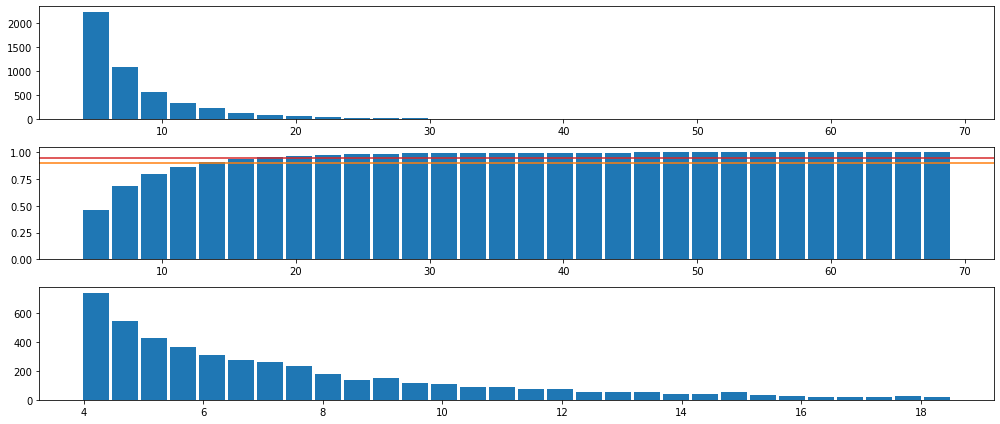

In [4]:
t_test = [meta[2] for meta in tqdm(meta_test)]
plot_statistics(t_test)

# t_dev = [meta[2] for meta in tqdm(meta_dev)]
# plot_statistics(t_dev)

In [5]:
meta_test_t_filtered = [meta for meta in tqdm(meta_test) if meta[2] < t_thres]

print(f'{len(meta_test)} => {len(meta_test_t_filtered)}')

meta_dev_t_filtered = [meta for meta in tqdm(meta_dev) if meta[2] < t_thres]

print(f'{len(meta_dev)} => {len(meta_dev_t_filtered)}')


4874 => 4648



148642 => 141776


40 => 40
1211 => 1211


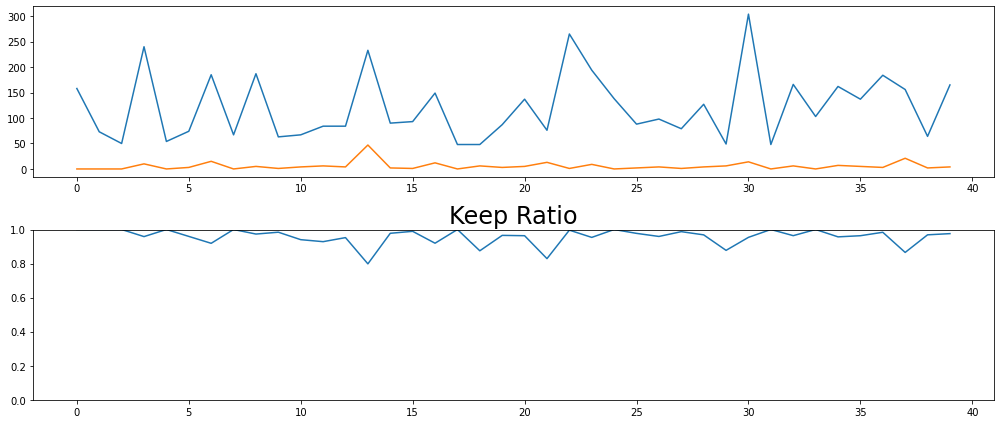

0.7982832618025751


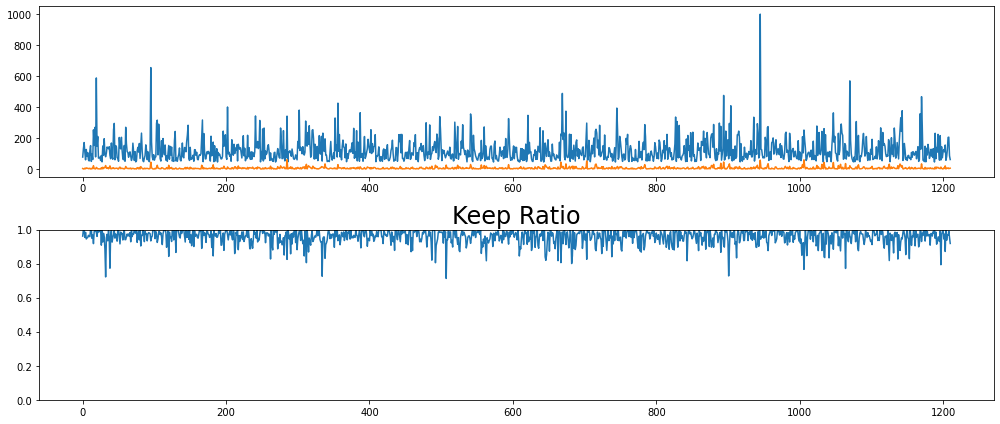

0.7126436781609196


In [6]:
test_dict = meta_to_dict(meta_test)
test_dict_filtered = meta_to_dict(meta_test_t_filtered)

dev_dict = meta_to_dict(meta_dev)
dev_dict_filtered = meta_to_dict(meta_dev_t_filtered)

print(f'{len(test_dict.keys())} => {len(test_dict_filtered.keys())}') # 40 => 40
print(f'{len(dev_dict.keys())} => {len(dev_dict_filtered.keys())}')   # 1211 => 1211


test_diff, test_count = compare_dict_counter(test_dict, test_dict_filtered)
dev_diff, dev_count = compare_dict_counter(dev_dict, dev_dict_filtered)